# Libraries used

In [97]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
sb.set() 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(max_depth= 4, criterion = 'entropy')
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 4, criterion='entropy')

# Reading of Dataset

## Removal of Duplicates and Missing Values
Converted 'age' from days to years

In [98]:
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-'] #Sometimes Missing Values are't in form of NaN
cardio_data = pd.read_csv('cardio_train.csv', delimiter = ';', na_values = missing_values) #read csv, set sep = ';' to split by ';'
cardio_data.drop_duplicates(keep = 'first', inplace = True)
cardio_data['age'] = cardio_data['age'].div(365).apply(lambda x: int(x))

cardio_data.head() #check data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


## Removal of outlier for blood pressure

In [99]:
cardio_wo_outlier_df = cardio_data.copy()
cardio_wo_outlier_df = cardio_wo_outlier_df[(cardio_wo_outlier_df['ap_lo']>=60) & (cardio_wo_outlier_df['ap_lo']<=120)]
cardio_wo_outlier_df = cardio_wo_outlier_df[(cardio_wo_outlier_df['ap_hi']>=60) & (cardio_wo_outlier_df["ap_hi"]<=180)]

cleaned_cardio_data = cardio_wo_outlier_df[cardio_wo_outlier_df['ap_hi'] >= cardio_wo_outlier_df['ap_lo']].reset_index(drop=True)
cleaned_cardio_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


### Before removal of outlier for blood pressure

<AxesSubplot: xlabel='cardio', ylabel='ap_hi'>

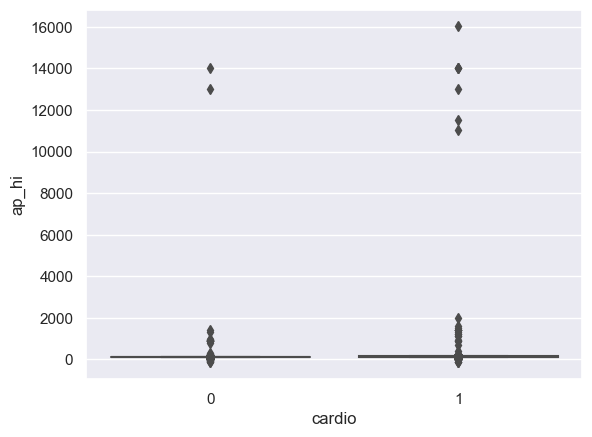

In [100]:
sb.boxplot(data=cardio_data, x='cardio', y='ap_hi')

<AxesSubplot: xlabel='cardio', ylabel='ap_lo'>

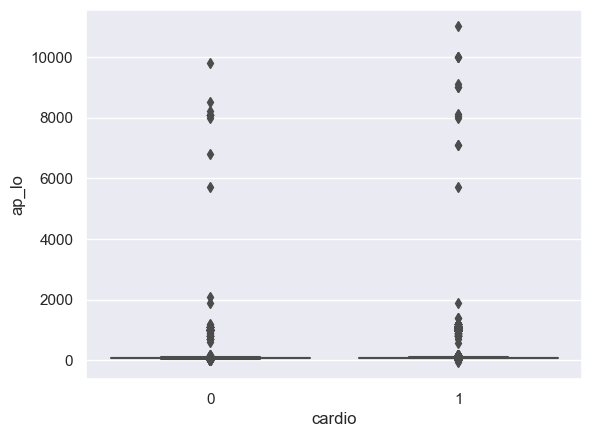

In [101]:
sb.boxplot(data=cardio_data, x='cardio', y='ap_lo')

### After removal of outlier for blood pressure

<AxesSubplot: xlabel='cardio', ylabel='ap_hi'>

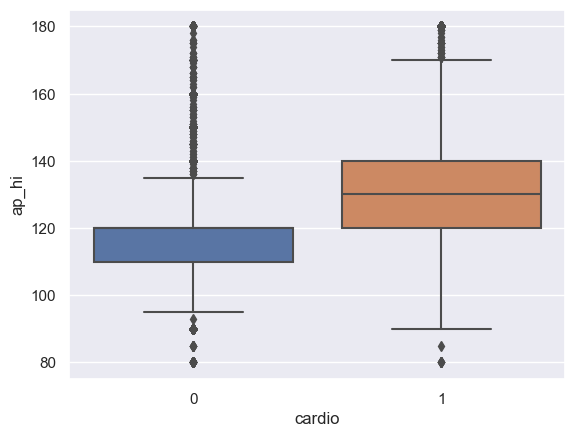

In [102]:
sb.boxplot(data=cleaned_cardio_data, x='cardio', y='ap_hi')

<AxesSubplot: xlabel='cardio', ylabel='ap_lo'>

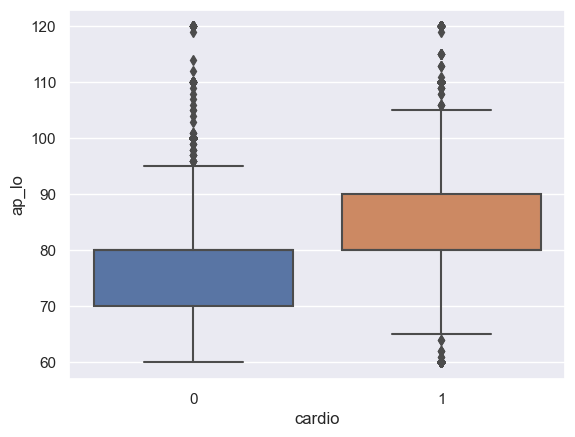

In [103]:
sb.boxplot(data=cleaned_cardio_data, x='cardio', y='ap_lo')

## Creation of 'BMI'. Removal of outliers of 'BMI'

In [104]:
bmi_array = {}
def calculateBMI(height, weight):
    height_in_meter = height/100
    bmi = weight / pow((height_in_meter),2)
    return(bmi)
for x in range(len(cleaned_cardio_data)):
    bmi_array[cleaned_cardio_data['id'][x]] = calculateBMI(cleaned_cardio_data['height'][x],cleaned_cardio_data['weight'][x])
df_bmi = pd.DataFrame(bmi_array.items(), columns=['id','bmi'])
cardio_data_bmi_before = pd.merge(cleaned_cardio_data,df_bmi, on='id')
cardio_data_bmi = cardio_data_bmi_before[(cardio_data_bmi_before['bmi'] >= 14) & (cardio_data_bmi_before['bmi'] <= 45)]

### Before removal of outlier for BMI

<AxesSubplot: xlabel='cardio', ylabel='bmi'>

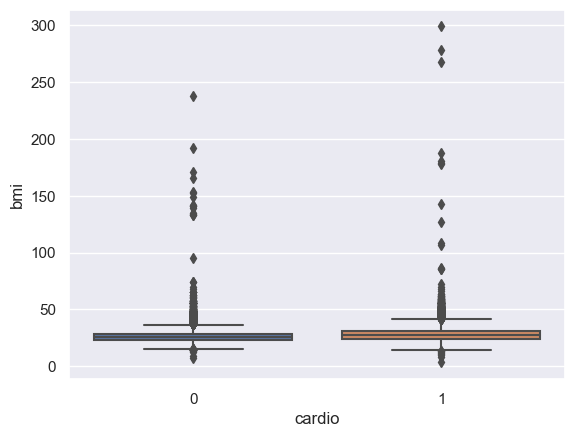

In [105]:
sb.boxplot(data=cardio_data_bmi_before, x='cardio', y='bmi')

### After removal of outlier for BMI

<AxesSubplot: xlabel='cardio', ylabel='bmi'>

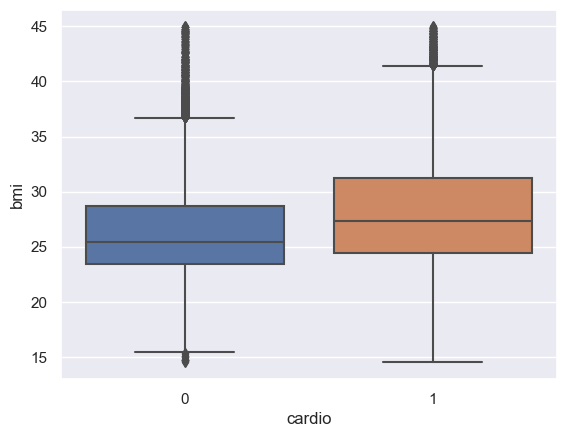

In [106]:
sb.boxplot(data=cardio_data_bmi, x='cardio', y='bmi')

# Data  visualisation

## 'Cardio' vs 'Gender'
Presence of Cardiovascular diesease is more on females

C:\Users\peggy\AppData\Local\Temp\ipykernel_7920\4150556601.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\peggy\AppData\Local\Temp\ipykernel_7920\4150556601.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\peggy\AppData\Local\Temp\ipykernel_7920\4150556601.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

<AxesSubplot: xlabel='gender', ylabel='count'>

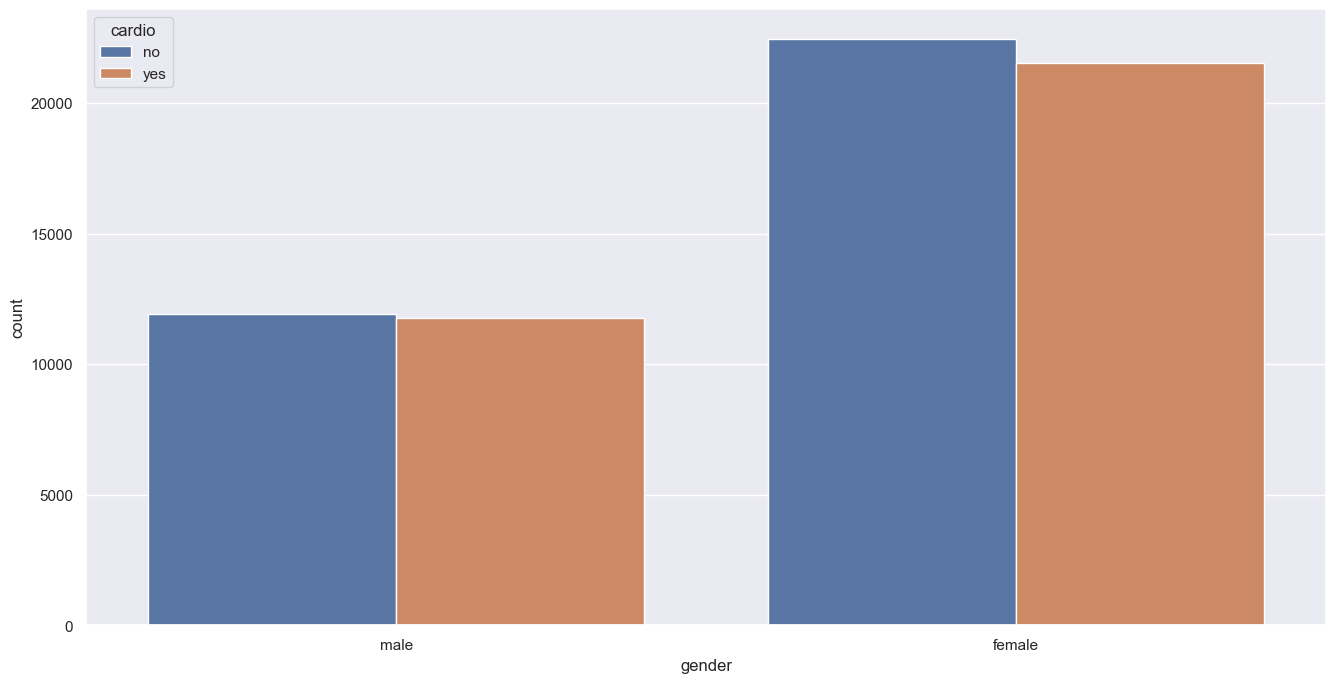

In [107]:
cardio_data_bmi['cardio'] = cardio_data_bmi['cardio'].replace(0,'no')
cardio_data_bmi['cardio'] = cardio_data_bmi['cardio'].replace(1,'yes')
cardio_data_bmi['gender'] = cardio_data_bmi['gender'].replace(2,'male')
cardio_data_bmi['gender'] = cardio_data_bmi['gender'].replace(1,'female')
f = plt.figure(figsize=(16, 8))
sb.countplot(x='gender', data=cardio_data_bmi, hue='cardio')
#sb.pointplot(data = cardio_data_bmi, x='gender', y='bmi', hue='cardio')

## Presence of Cardiovascular Disease on various range of blood pressure

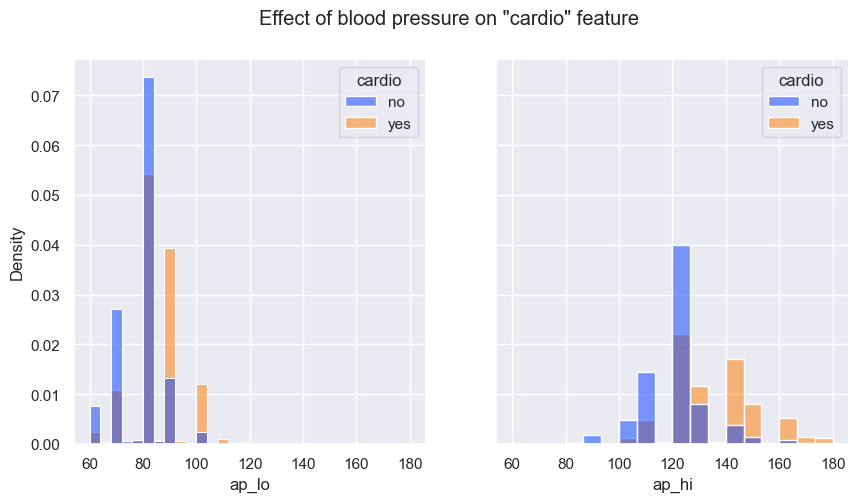

In [108]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True,sharey=True)
sb.histplot(cardio_data_bmi, x="ap_hi", hue="cardio",bins=15,palette='bright',stat="density",ax=axes[1])
sb.histplot(cardio_data_bmi, x="ap_lo", hue="cardio",bins=15,palette='bright',stat="density",ax=axes[0])
f.suptitle('Effect of blood pressure on "cardio" feature')
plt.show()

## Presence of Cardiovascular Disease on different ranges of Age (Using plotly)

In [130]:
f = plt.figure(figsize=(8, 5))
#sb.pointplot(data = cardio_data_bmi, x='cardio', y='age')

labels = ['Age (below 40)', 'Age (41-50)', 'Age (51-60)', 'Age (above 60)']

below40_count = 0
below50_count = 0
below60_count = 0
below70_count = 0

for k, res in enumerate(cardio_data_bmi[cardio_data_bmi['cardio'] == 1]['age']):
    if (res <= 40):
        below40_count+=1
    elif ((res > 40) & (res <= 50)):
        below50_count+=1
    elif ((res > 50) & (res <= 60)):
        below60_count+=1
    elif (res > 60):
        below70_count+=1

values = [below40_count, below50_count, below60_count, below70_count]
print(values)
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

[738, 7952, 18035, 6577]


<Figure size 800x500 with 0 Axes>

## Presence of Cardiovascular Disease on different ranges of BMI (Using plotly)

In [131]:
f = plt.figure(figsize=(8, 5))
#sb.pointplot(data = cardio_data_bmi, x='cardio', y='age')

underweight_count = 0
healthy_count = 0
overweight_count = 0
obese_count = 0

labels = ['Underweight (14-18.4)', 'Healthy (18.5-24.9)', 'Overweight (25-29.9)', 'Obese (30-45)']

for k, res in enumerate(cardio_data_bmi[cardio_data_bmi['cardio'] == 1]['bmi']):
    if (res < 18.5):
        underweight_count+=1
    elif ((res >= 18.5) & (res < 25)):
        healthy_count+=1
    elif ((res >= 25) & (res < 30)):
        overweight_count+=1
    elif (res >= 45):
        obese_count+=1

values = [underweight_count, healthy_count, overweight_count, obese_count]
print(values)
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

[169, 10060, 12350, 0]


<Figure size 800x500 with 0 Axes>

## Correlation of all features

C:\Users\peggy\AppData\Local\Temp\ipykernel_7920\4209038866.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\peggy\AppData\Local\Temp\ipykernel_7920\4209038866.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\peggy\AppData\Local\Temp\ipykernel_7920\4209038866.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Text(0.5, 1.0, 'Corelation Between Factors')

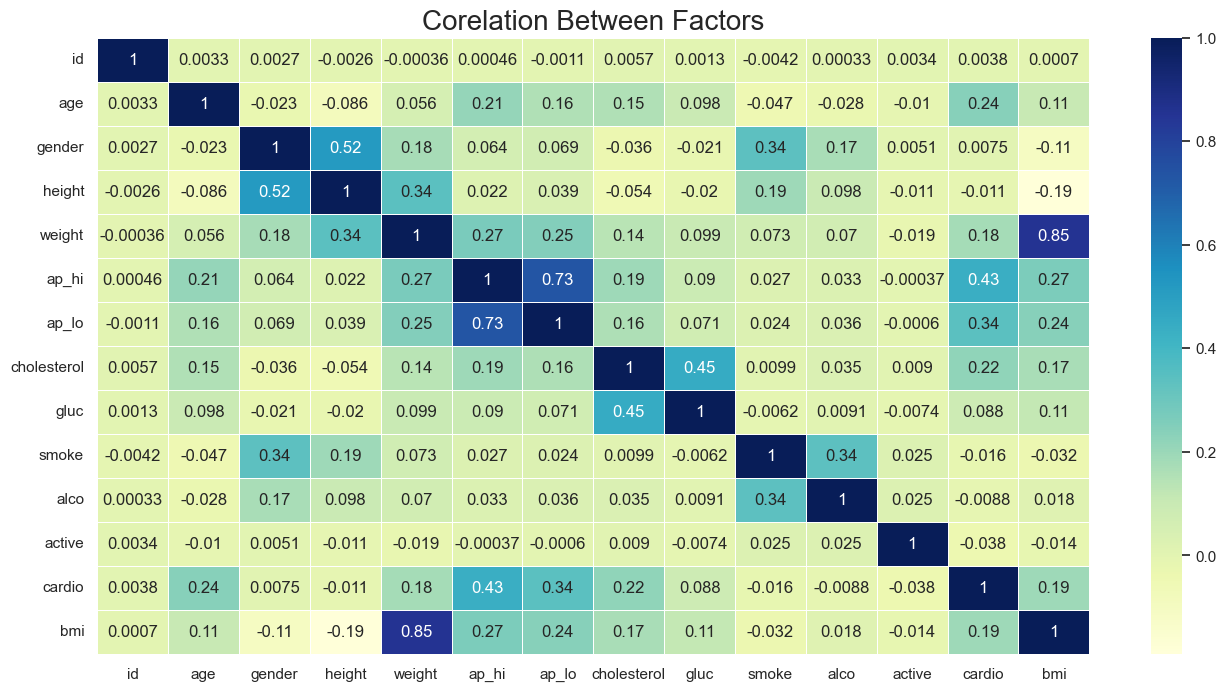

In [111]:
cardio_data_bmi['cardio'] = cardio_data_bmi['cardio'].replace('no',0)
cardio_data_bmi['cardio'] = cardio_data_bmi['cardio'].replace('yes',1)
cardio_data_bmi['gender'] = cardio_data_bmi['gender'].replace('male', 2)
cardio_data_bmi['gender'] = cardio_data_bmi['gender'].replace('female', 1)
f = plt.figure(figsize=(16, 8))
sb.heatmap(cardio_data_bmi.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Factors', fontsize = 20)

# Logistic Regression

## Logistic Regression Curve 
BMI vs Cardio

c:\Users\peggy\anaconda3\envs\ie0005\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\peggy\anaconda3\envs\ie0005\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



Accuracy: 0.5758184611748021


<AxesSubplot: >

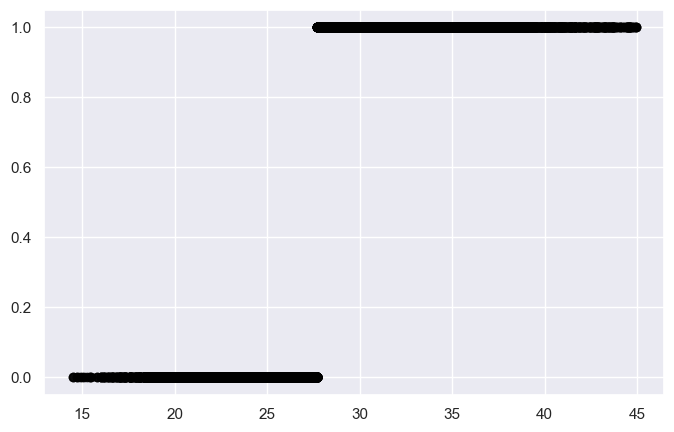

In [112]:
#X = cardio_data_bmi[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','bmi']]
X = np.array(cardio_data_bmi["bmi"]).reshape(-1, 1)
Y = np.array(cardio_data_bmi["cardio"]).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
plt.figure(figsize=(8,5))
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
sb.regplot(x=X_test, y=y_pred, logistic=True, ci=None, fit_reg=True, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

## Probability from Logistic Regression

In [113]:
X = cardio_data_bmi[['age','weight','ap_hi','ap_lo','cholesterol','bmi']]
Y = np.array(cardio_data_bmi["cardio"]).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
plt.figure(figsize=(16,8))
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

c:\Users\peggy\anaconda3\envs\ie0005\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



<Figure size 1600x800 with 0 Axes>

### Probability of Cardiovascular Disease on Non-alcoholic and Alcoholic

c:\Users\peggy\anaconda3\envs\ie0005\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0, 0.5, 'Probability of Cardiovascular Disease')

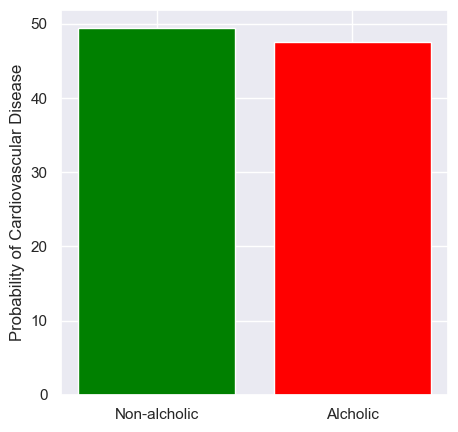

In [114]:
x = np.array(cardio_data_bmi["alco"]).reshape(-1,1)
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25)

logreg = LogisticRegression()
logreg.fit(x_train, Y_train)

def logit2prob(logreg, X):
    log_odds = logreg.coef_ * X + logreg.intercept_
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    return(probability)
probability_cardio = logit2prob(logreg, x).tolist()
probability_cardio_list = []
for z in range(len(probability_cardio)):
    probability_cardio_list.append(probability_cardio[z][0]*100)
labels = ['Non-alcholic', 'Alcholic']
values = set(probability_cardio_list)
values = list(values)
plt.figure(figsize = (5, 5))
plt.bar(labels, values, color = ['green','red'])
plt.ylabel("Probability of Cardiovascular Disease")

### Probability of Cardiovascular Disease on No smoking and Smoking

c:\Users\peggy\anaconda3\envs\ie0005\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0, 0.5, 'Probability of Cardiovascular Disease')

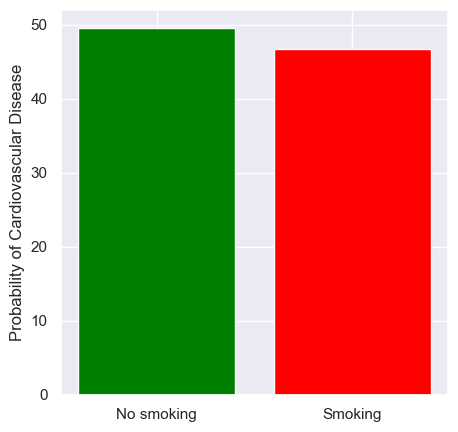

In [115]:
x = np.array(cardio_data_bmi["smoke"]).reshape(-1,1)
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25)

logreg = LogisticRegression()
logreg.fit(x_train, Y_train)

def logit2prob(logreg, X):
    log_odds = logreg.coef_ * X + logreg.intercept_
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    return(probability)
probability_cardio = logit2prob(logreg, x).tolist()
probability_cardio_list = []
for z in range(len(probability_cardio)):
    probability_cardio_list.append(probability_cardio[z][0]*100)
labels = ['No smoking', 'Smoking']
values = set(probability_cardio_list)
values = list(values)
plt.figure(figsize = (5, 5))
plt.bar(labels, values, color = ['green','red'])
plt.ylabel("Probability of Cardiovascular Disease")

### Probability of Cardiovascular Disease on Inactive and Active

c:\Users\peggy\anaconda3\envs\ie0005\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0, 0.5, 'Probability of Cardiovascular Disease')

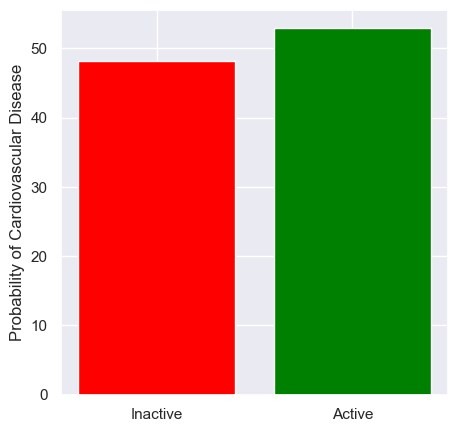

In [116]:
x = np.array(cardio_data_bmi["active"]).reshape(-1,1)
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25)

logreg = LogisticRegression()
logreg.fit(x_train, Y_train)

def logit2prob(logreg, X):
    log_odds = logreg.coef_ * X + logreg.intercept_
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    return(probability)
probability_cardio = logit2prob(logreg, x).tolist()
probability_cardio_list = []
for z in range(len(probability_cardio)):
    probability_cardio_list.append(probability_cardio[z][0]*100)
labels = ['Inactive', 'Active']
values = set(probability_cardio_list)
values = list(values)
plt.figure(figsize = (5, 5))
plt.bar(labels, values, color = ['red','green'])
plt.ylabel("Probability of Cardiovascular Disease")

### Probability of Cardiovascular Disease on different range of BMI

c:\Users\peggy\anaconda3\envs\ie0005\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Text(0, 0.5, 'Probability of the getting Cardiovascular Diseases')

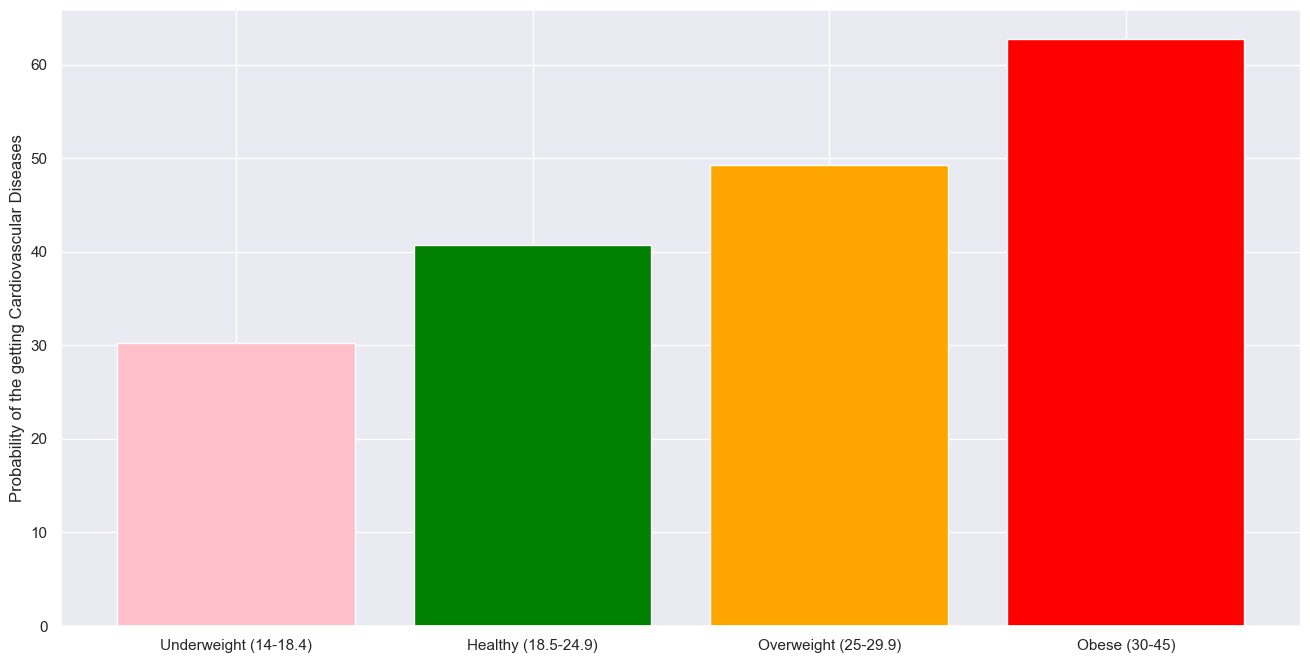

In [117]:
x = np.array(cardio_data_bmi["bmi"]).reshape(-1,1)

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25)

logreg = LogisticRegression()
logreg.fit(x_train, Y_train)

def logit2prob(logreg, X):
    log_odds = logreg.coef_ * X + logreg.intercept_
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    return(probability)

probability_bmi_list = logit2prob(logreg, x).tolist()
probability_underweight = []
probability_healthy = []
probability_overweight = []
probability_obese = []
labels = ['Underweight (14-18.4)', 'Healthy (18.5-24.9)', 'Overweight (25-29.9)', 'Obese (30-45)']

for i, res in enumerate(cardio_data_bmi['bmi']):
    if (res < 18.5):
        probability_underweight.append(probability_bmi_list[i][0])
    elif ((res >= 18.5) & (res < 25)):
        probability_healthy.append(probability_bmi_list[i][0])
    elif ((res >= 25) & (res < 30)):
        probability_overweight.append(probability_bmi_list[i][0])
    elif (res >= 30):
        probability_obese.append(probability_bmi_list[i][0])

def Average(lst):
    average = sum(lst) / len(lst)
    return (average*100)

values = [Average(probability_underweight), Average(probability_healthy), Average(probability_overweight), Average(probability_obese)]
plt.figure(figsize = (16, 8))
plt.bar(labels, values, color = ['pink','green','orange','red'])
plt.ylabel("Probability of the getting Cardiovascular Diseases")

## Confusion Matrix w/ Accuracy, Precision and Recall

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8454
           1       0.76      0.65      0.70      8468

    accuracy                           0.72     16922
   macro avg       0.73      0.72      0.72     16922
weighted avg       0.73      0.72      0.72     16922

Accuracy: 0.7232005673088288
Precision: 0.7590361445783133
Recall: 0.6547000472366556


<AxesSubplot: title={'center': 'Confusion matrix'}>

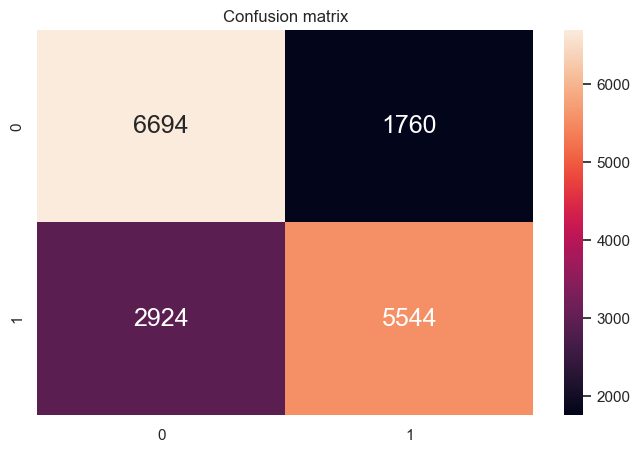

In [118]:
features = ['age', 'ap_hi','ap_lo','cholesterol','bmi']
X = cardio_data_bmi[features]
Y = cardio_data_bmi['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("Recall:",metrics.recall_score(y_test, y_pred)) 
plt.figure(figsize=(8,5))
plt.title('Confusion matrix') 
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## ROC Curve with AUC

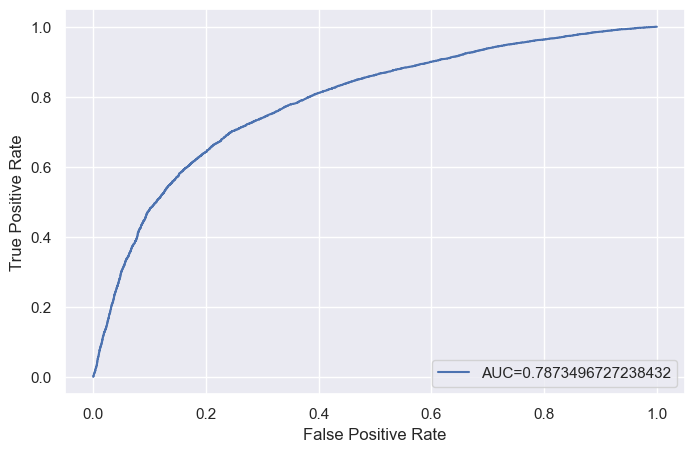

In [119]:
plt.figure(figsize=(8,5))
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

# Decision Tree

## Confusion matrix w/ Accuracy, Precision and Recall

Accuracy: 0.7237915140054367
Precision: 0.7217432950191571
Recall: 0.719503461446646


<AxesSubplot: title={'center': 'Confusion matrix'}>

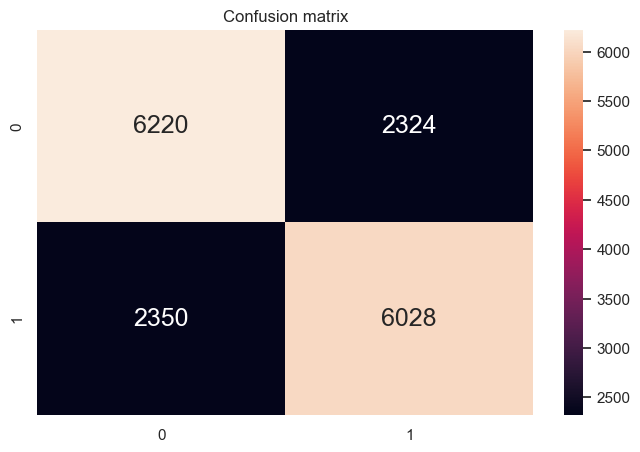

In [120]:
features = ['age','weight','ap_hi','ap_lo','cholesterol','bmi']
X = cardio_data_bmi[features]
Y = cardio_data_bmi['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
dectree.fit(X_train,y_train)
y_pred = dectree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("Recall:",metrics.recall_score(y_test, y_pred)) 
plt.figure(figsize=(8,5))
plt.title('Confusion matrix') 
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


## Decision tree visualisation

[Text(0.5, 0.9, 'ap_hi <= 129.5\nentropy = 1.0\nsamples = 50766\nvalue = [25842, 24924]'),
 Text(0.25, 0.7, 'age <= 54.5\nentropy = 0.899\nsamples = 30519\nvalue = [20912, 9607]'),
 Text(0.125, 0.5, 'cholesterol <= 2.5\nentropy = 0.788\nsamples = 18954\nvalue = [14482, 4472]'),
 Text(0.0625, 0.3, 'age <= 44.5\nentropy = 0.761\nsamples = 18149\nvalue = [14143, 4006]'),
 Text(0.03125, 0.1, 'entropy = 0.609\nsamples = 5563\nvalue = [4731, 832]'),
 Text(0.09375, 0.1, 'entropy = 0.815\nsamples = 12586\nvalue = [9412, 3174]'),
 Text(0.1875, 0.3, 'bmi <= 28.243\nentropy = 0.982\nsamples = 805\nvalue = [339, 466]'),
 Text(0.15625, 0.1, 'entropy = 1.0\nsamples = 545\nvalue = [270, 275]'),
 Text(0.21875, 0.1, 'entropy = 0.835\nsamples = 260\nvalue = [69, 191]'),
 Text(0.375, 0.5, 'cholesterol <= 2.5\nentropy = 0.991\nsamples = 11565\nvalue = [6430, 5135]'),
 Text(0.3125, 0.3, 'age <= 60.5\nentropy = 0.979\nsamples = 10374\nvalue = [6076, 4298]'),
 Text(0.28125, 0.1, 'entropy = 0.954\nsamples = 7

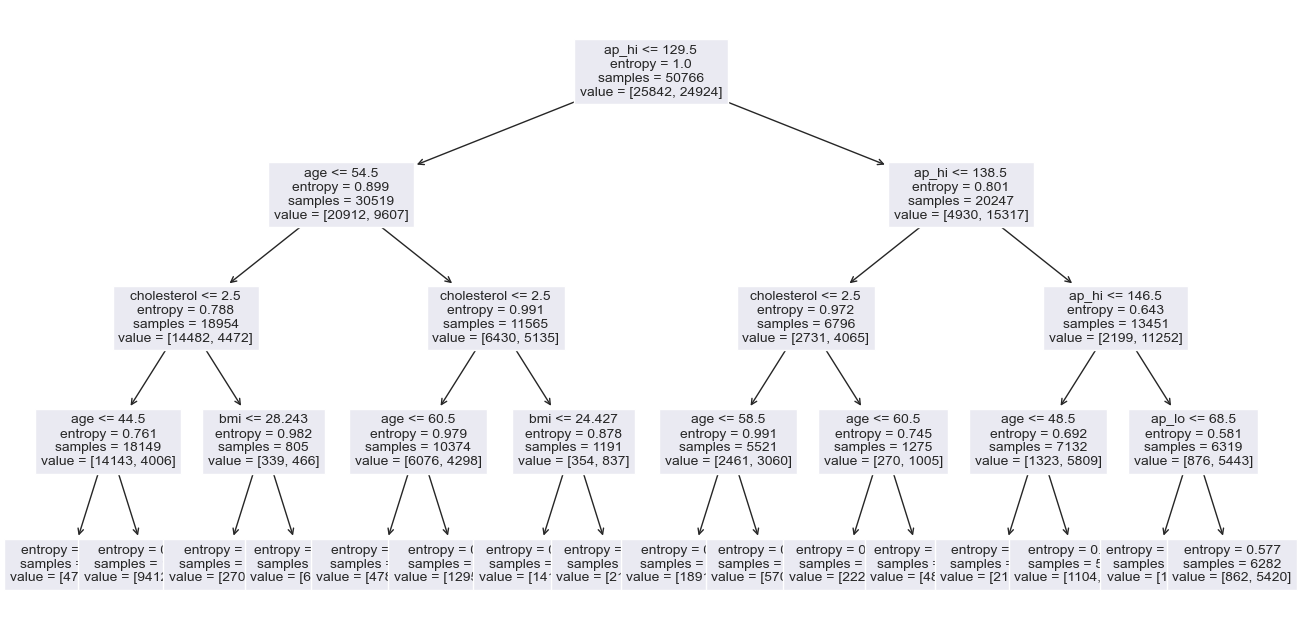

In [121]:
plt.figure(figsize=(16,8))
tree.plot_tree(dectree, feature_names = features, fontsize=10)

## ROC curve with AUC

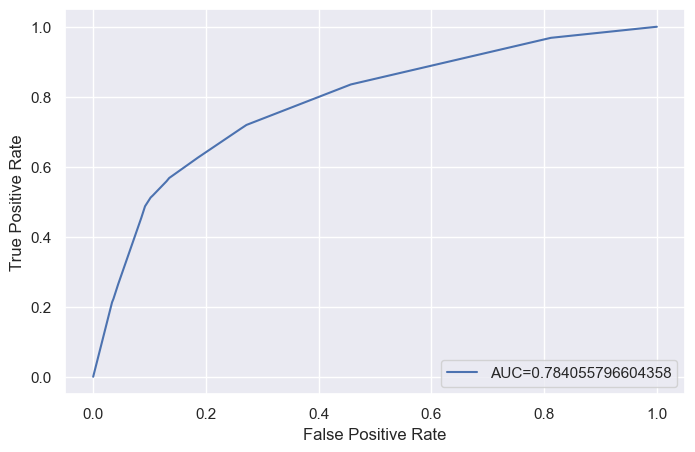

In [122]:
plt.figure(figsize=(8,5))
y_pred_proba = dectree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

# Random Forest Classifier

In [129]:
features = ['age','ap_hi','ap_lo','cholesterol','bmi']
X = cardio_data_bmi[features]
Y = cardio_data_bmi['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4)

## Confusion matrix w/ Accuracy, Precision and Recall

Accuracy: 0.7250915967379742
Precision: 0.7503093633988726
Recall: 0.6580248402266972


<AxesSubplot: title={'center': 'Confusion matrix'}>

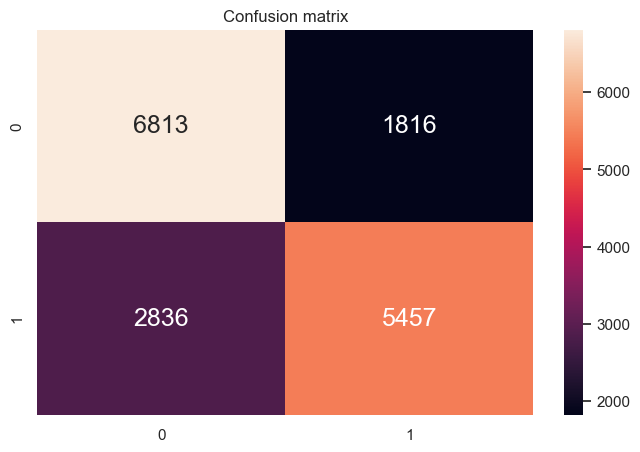

In [128]:
#plot confusion_matrix
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("Recall:",metrics.recall_score(y_test, y_pred)) 
plt.figure(figsize=(8,5))
plt.title('Confusion matrix') 
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## ROC curve with AUC

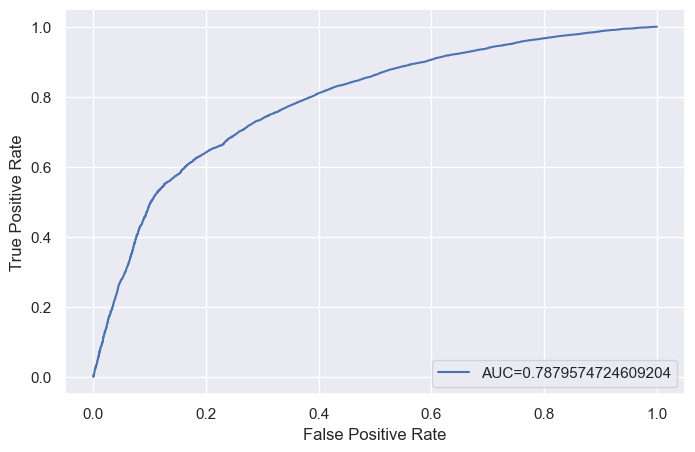

In [133]:
plt.figure(figsize=(8,5))
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)